In [24]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
raw = pd.read_csv('/Users/andy/Desktop/py4fi2nd-master/source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [3]:
data = raw[['.SPX', '.VIX']].dropna()

In [4]:
data.tail()

,.SPX,.VIX
Date,,
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91
2018-06-28,2716.31,16.85
2018-06-29,2718.37,16.09


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c2d5748>,
      dtype=object)

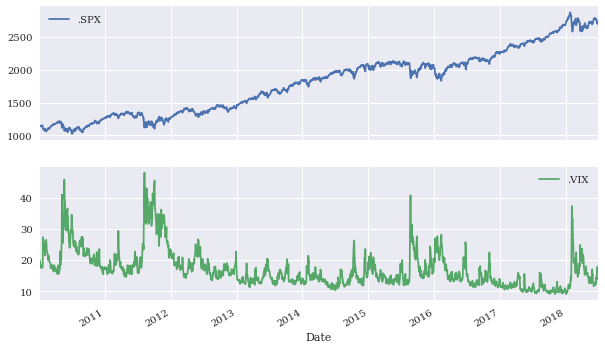

In [5]:
data.plot(subplots=True, figsize=(10, 6))

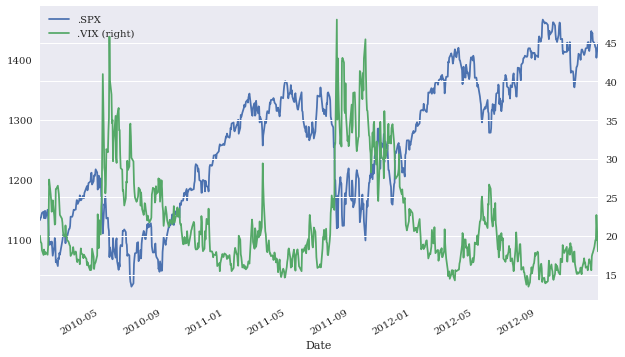

In [8]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6))
# loc[:DATE] selects the data until the given value DATE

In [9]:
rets = np.log(data / data.shift(1))

In [10]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [11]:
rets.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bad5cf8>,
      dtype=object)

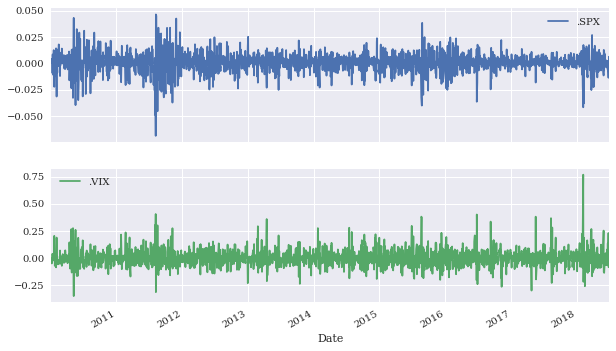

In [12]:
rets.plot(subplots=True, figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b7fb588>,
      dtype=object)

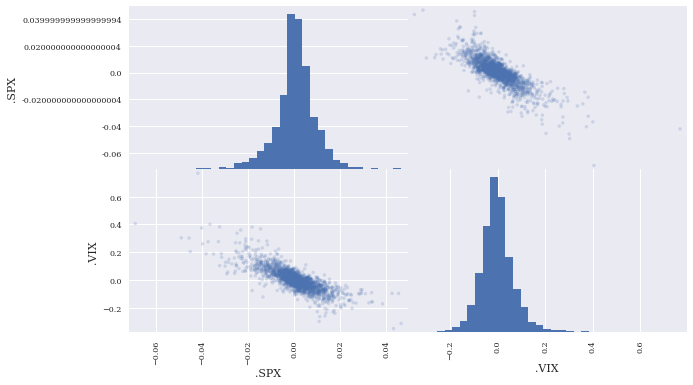

In [13]:
pd.plotting.scatter_matrix(rets,
                          alpha=0.2,  # for the opacity of the dots
                          diagonal='hist',  # What to place on the diagonal,here: a histogram of the column data
                          hist_kwds={'bins': 35},  # Keywords to be passed to the histogram plotting function
                          figsize=(10, 6))

In [14]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
# This implements a linear OLS regression

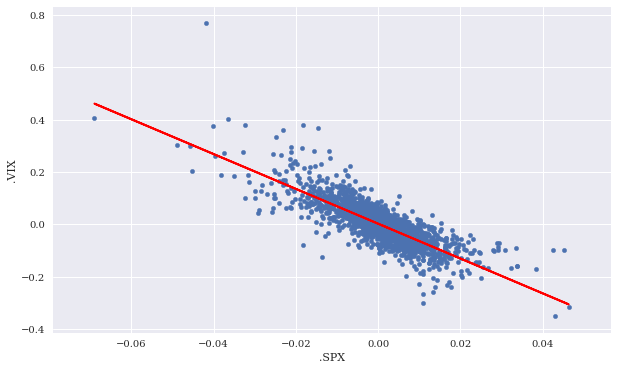

In [15]:
# plots the log returns as a scatter plot to which the linear regression line is added
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

In [16]:
rets.corr()
# correlation matrix for the whole DataFrame

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


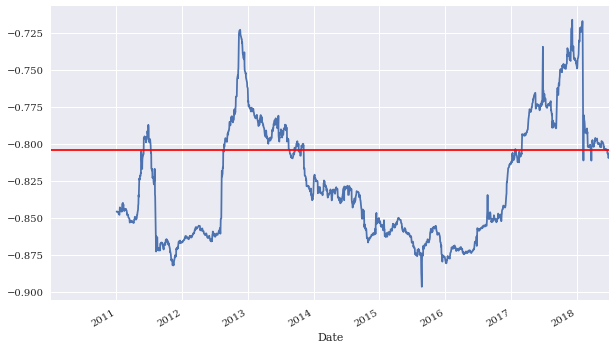

In [20]:
ax = rets['.SPX'].rolling(window=252).corr(
    rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r')
# plots the rolling correlation over time and adds the static value to the plot as horizontal line

In [26]:
# High-Frequency Data

%time
tick = pd.read_csv('/Users/andy/Desktop/py4fi2nd-master/source/fxcm_eur_usd_tick_data.csv',
                  index_col=0, parse_dates=True)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 31 µs


In [27]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    461357 non-null float64
Ask    461357 non-null float64
dtypes: float64(2)
memory usage: 10.6 MB


In [28]:
tick['Mid'] = tick.mean(axis=1)
# Calculates the Mid price for every data row

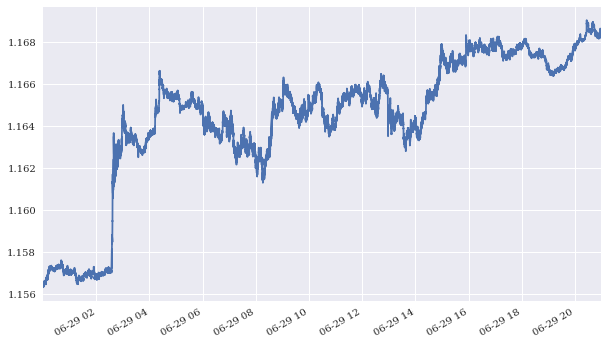

In [29]:
tick['Mid'].plot(figsize=(10, 6))

In [30]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [31]:
tick_resam.head()

,Bid,Ask,Mid
2018-06-29 00:05:00,1.15649,1.15651,1.156500
2018-06-29 00:10:00,1.15671,1.15672,1.156715
2018-06-29 00:15:00,1.15725,1.15727,1.157260
2018-06-29 00:20:00,1.15720,1.15722,1.157210
2018-06-29 00:25:00,1.15711,1.15712,1.157115


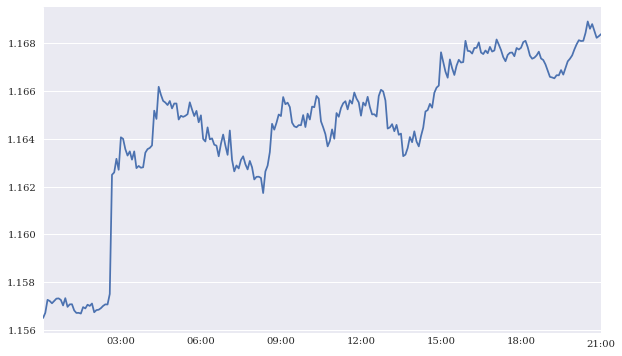

In [32]:
tick_resam['Mid'].plot(figsize=(10, 6))